# Red con \\(N\gg1\\) grados de libertad

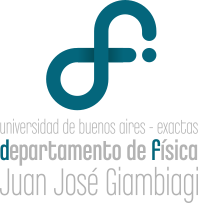  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado
\(N\) partículas de masa \(m\) están equiespaciadas en una distancia \(a\).
Están sujetas a paredes mediante resortes de coeficiente de dureza \(k\) y longitud natural \(l_0\).
A su vez, en la dirección en que pueden desplazarse, están vinculadas por resortes con el mismo \(k\) pero de longitud natural \(a > l_0\).  
[ht]![](figuras/g-008.png)
1. Escriba la ecuación de movimiento para la partícula énésima.
	Indique todas las aproximaciones que realiza.
1. Proponga una solución adecuada y halle la relación de dispersión.
	¿Cuál es la frecuencia más baja posible?
1. Imponga las condiciones de contorno apropiadas para el sistema y calcule las frecuencias propias del mismo.
	Escriba la solución para el movimiento de cada partícula.
1. (*) Particularice para el caso \(N = 2\) y compare con el resultado que obtiene resolviendo el problema ``matricialmente''.
	Esquematice los modos normales de oscilación.

## Resolución

### Potencial asociado a la partícula \\(n\\)

In [3]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [5]:
t = sym.Symbol('t')
k, a, l_0 = sym.symbols('k, a, l_0', positive=True) # parámetros físicos

psi_nMinus = sym.Function('\Psi_{n-1}')(t)
psi_n = sym.Function('\Psi_{n}')(t)
psi_nPlus = sym.Function('\Psi_{n+1}')(t)

In [6]:
l_superior = sym.sqrt(a**2 + psi_n**2)
l_inferior = sym.sqrt(a**2 + psi_n**2)
l_izquierdo = a + psi_n - psi_nMinus
l_derecho = a + psi_nPlus - psi_n

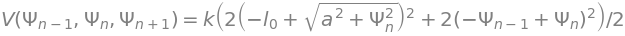

In [8]:
V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           k/2* (
               (l_izquierdo - a)**2 + (l_izquierdo - a)**2 +
               (l_superior - l_0 )**2 + (l_inferior - l_0 )**2
           ) 
          )
V

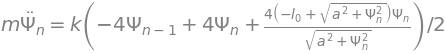

In [9]:
m = sym.Symbol('m', positive=True) # parámetros físicos
sym.Eq(m* psi_n.diff(t,2),  V.rhs.diff(psi_n) ) 

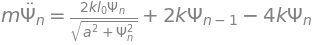

In [14]:
psi_n_2a = sym.Eq(m* psi_n.diff(t,2), -V.rhs.diff(psi_n).simplify() ) 
psi_n_2a

In [19]:
variables = [psi_nMinus, psi_n, psi_nPlus]
taylor_subs ={
    psi_nMinus : 0,
    psi_n : 0,
    psi_nPlus : 0,
}
unMedio = sym.Rational(1,2)
def taylor1erOrden1D(segundaLey):
    segundaLey_rhs_1erOrden = segundaLey.rhs.subs(taylor_subs) # Debe ser nula, sirve para verificar
    for variable in variables: 
        segundaLey_rhs_1erOrden += segundaLey.rhs.diff(variable).subs(taylor_subs)* variable
    segundaLey_rhs_1erOrden = segundaLey_rhs_1erOrden.collect(variables) # collect agrupa lo que multiplica a su argumento
    return sym.Eq(segundaLey.lhs, segundaLey_rhs_1erOrden)


psi_n_2a1erOrden = taylor1erOrden1D(psi_n_2a)
psi_n_2a1erOrden